In [26]:
%pylab inline
import sys
sys.path.append('../t1fitter/')
import t1fitter
import util
import optim

import scipy
import numpy as np



Populating the interactive namespace from numpy and matplotlib


In [27]:
fitter = t1fitter.T1Fitter()

#make some small fake data so we can test gradients

sz = (12,12,8)

dat = np.ones(sz + (2,))

dat[2:6,:,:,0] = 1.5
dat[6:-2,:,:,0] = 2

dat[2:6,:,:,1] = 2
dat[6:-2,:,:,1] = 2

dat[:,6:-2,...] *= 0.5

dat[:,:,2:6,:] *= 2

dat = dat.transpose((3,0,1,2))


b1 = np.ones(sz)
mask = np.zeros_like(b1)

mask[2:-2,2:-2,2:-2] = 1

In [50]:
fitter.data = dat
fitter.mask = mask
fitter.b1map = b1
fitter.volshape = list(sz)

fitter.l1_lam = 0.0
fitter.kern_sz = 1
fitter.huber_scale = 0.25

fitter.l2_lam = 0
fitter.outpath='.'
fitter.smooth=1
fitter.l2_mode = 'smooth_vfa'
fitter.start_mode = 'vfa'
fitter.fit_method='nlreg'
fitter.log.setLevel(0)

fitter.flips = np.array([14.0, 3.0])*np.pi/180.0
fitter.trs = np.array([10.0, 10.0])*1e-3


x0 = fitter.nlreg_fit(prep_only=True)

# get t1 optimizer instance once everything is prepped
tfit = fitter.tfit


print (b1.shape)
print (mask.shape)
print np.sum(mask)
print (dat.shape)
print (x0.shape)

tfit.run_fit(x0, prep_only=True)

tfit.obj_scale = 1.0

print (np.sum(tfit.x0))

tfit.x0 += 1
print (np.sum(tfit.x0))



(12, 12, 8)
(12, 12, 8)
256.0
(2, 1152)
(12, 12, 8, 2)
1021.18531818
1533.18531818


In [51]:
def insertVol(x, dims=2):
    vol = np.zeros(sz + (dims,))
    vol[mask>0,:] = x.reshape(-1,dims)
    return vol

In [52]:
myx = tfit.x0*0.5
gres = tfit.gradient(myx).reshape(-1,2)
gv = insertVol(gres)

In [53]:
#check close to data
myx = myx - 0.5*gres.ravel()
gres = tfit.gradient(myx).reshape(-1,2)
gv = insertVol(gres)

In [54]:
tfit.objective(myx)

0.073717807742934544

In [55]:
vx0 = fitter.fit.copy().reshape(sz+(2,))

In [56]:
vx0 = x0.copy().reshape(sz+(2,))*0.50

In [57]:
vp = insertVol(fitter.prior, dims=1)

<matplotlib.colorbar.Colorbar instance at 0x7fdf1fe2dcb0>

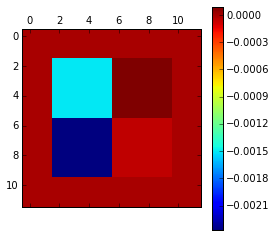

In [58]:
matshow(gv[:,:,4,0])
colorbar()

In [59]:
vx0 = fitter.fit.copy().reshape(sz+(2,))

<matplotlib.colorbar.Colorbar instance at 0x7fdf1fc0d248>

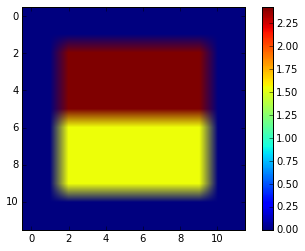

In [60]:
imshow(vx0[:,:,4,1])
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fdf1fae3f38>

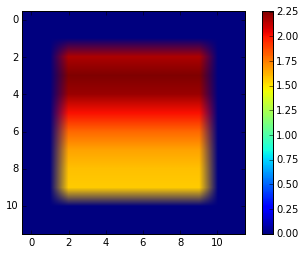

In [61]:
imshow(vp[:,:,4,0])
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fdf1f959908>

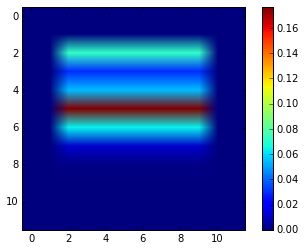

In [62]:
imshow((vx0[:,:,4,1] -vp[:,:,4,0])**2 )
colorbar()

In [63]:
(sum((vx0[:,:,:,1] -vp[:,:,:,0])**2))

13.167276187752783

In [64]:
myx = tfit.x0*0.5
gtest = tfit.gradient(myx)
szg = gtest.shape
gv = insertVol(gtest.reshape(-1,2))


In [65]:
sum(gv**2)

0.00064788632371642972

In [66]:
eps = 1e-7
gnum = np.zeros(szg)
for x in arange(szg[0]):
    myx2 = myx.copy()
    myx2[x] += eps
    f1 = tfit.objective(myx)
    f2 = tfit.objective(myx2)
    gnum[x] = (f2-f1)/eps
    
gvn = insertVol(gnum.reshape(-1,2))


<matplotlib.colorbar.Colorbar instance at 0x7fdf1f31fea8>

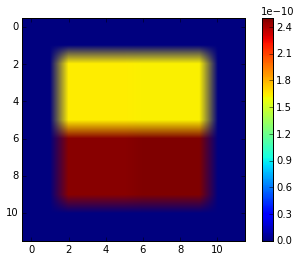

In [71]:
imshow((gvn[:,:,4,0] - gv[:,:,4,0]))
#clim([0,1])
colorbar()

In [68]:
(sum((gvn -gv)**2))

1.2356997489934335e-17

<matplotlib.colorbar.Colorbar instance at 0x7fdf1ffe3cf8>

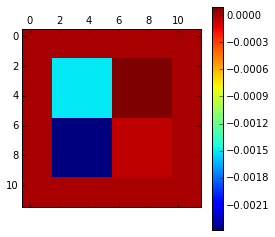

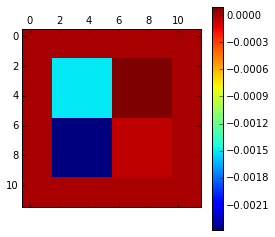

In [69]:
matshow((gvn[:,:,2,0]))
colorbar()
matshow((gv[:,:,2,0]))
colorbar()


<matplotlib.colorbar.Colorbar instance at 0x7fdf1f50a998>

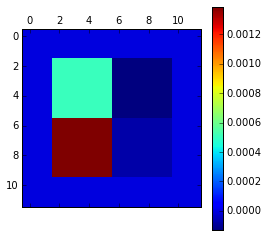

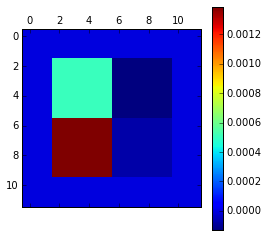

In [70]:
matshow((gvn[:,:,2,1]))
colorbar()
matshow((gv[:,:,2,1]))
colorbar()
